<a href="https://colab.research.google.com/github/NoahLee99/Data-Science-studylog/blob/main/4%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.

!pip install koreanize-matplotlib
import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.3 MB/s eta 0:00:00


In [ ]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


,count
판매유형별,
면세점 이외,2772


**Q1.**

In [ ]:
# 컬럼명을 "백만"으로 변경
df = df.rename(columns = {"데이터" : "백만"})
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0])) # "시점"에서 새로운 "연도" 파생변수 생성
df["분기"] = df["시점"].map(lambda x: int(x.split(".")[1].split("/")[0])) # "시점"에서 새로운 "분기" 파생변수 생성

In [ ]:
df.columns # 추가된 컬렴명 확인

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '백만', '연도', '분기'], dtype='object')

In [ ]:
df.describe() # 기술통계값 구하기

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


* 연도 컬럼에서, 데이터가 주로 2018년 이후에 집중되어 있음을 알 수 있음.
* 분기 컬럼에서는 1분기와 4분기 값이 가장 많이 나타난 것을 보아, 가장 활발한 transaction이 발생했을 가능성이 높아보임.

**Q2.**

In [ ]:
# 단위를 "백만"으로 국가(대륙)별, 연도별 합산 금액 피봇테이블화
df_sum = df.pivot_table(index='국가(대륙)별', columns='연도', values='백만', aggfunc='sum')
df_sum

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


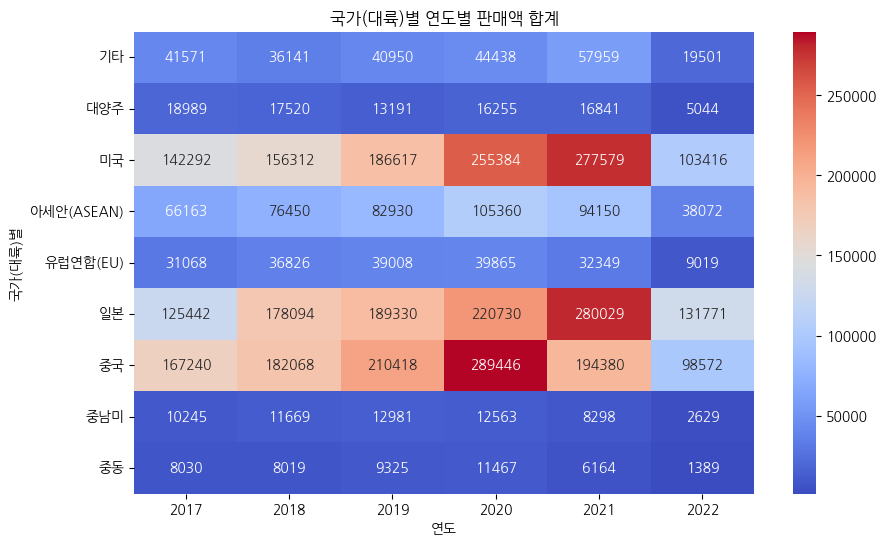

In [ ]:
# 피봇테이블을 seaborn을 사용하여 히트맵 시각화 (직관성을 위해 cmap="coolwarm" 사용함)
plt.figure(figsize=(10, 6))
sns.heatmap(df_sum, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.xlabel('연도')
plt.ylabel('국가(대륙)별')
plt.show()

* 중국이 대부분의 연도에 가장 높은 판매액을 기록했음.
* 미국은 안정적이고 점진적인 판매액 성장을 기록함.

**Q3.**

In [ ]:
# 2020연도 데이터 필터링 후 groupby를 사용한 지역, 상품군별 합계 계산
df_2020 = df[df['연도'] == 2020]
grouped_df = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack()
print(grouped_df)

상품군별        가전·전자·통신기기    기 타  농축수산물  사무·문구  생활용품 및 자동차용품   서 적  소프트웨어  \
국가(대륙)별                                                                  
기타                1716   3345      9    187          1464  4563     21   
대양주               3825    923      1     21          1198   367     20   
미국               10103  38731     33    398         11467  9709    865   
아세안(ASEAN)       12405   2620     17   3279          6432  4192      3   
유럽연합(EU)          3040   3907      0     25          2560   514     99   
일본                 404  30509      2   1526          3911  1055     27   
중국                1353  22736     88    403          7142  6659      4   
중남미                912    625      0      3          1361   188     15   
중동                 839    533      0      4          1060   139     17   

상품군별        스포츠·레저용품  아동·유아용품  음·식료품  음반·비디오·악기  의류 및 패션 관련상품  컴퓨터 및 주변기기  \
국가(대륙)별                                                                     
기타               755     1646  

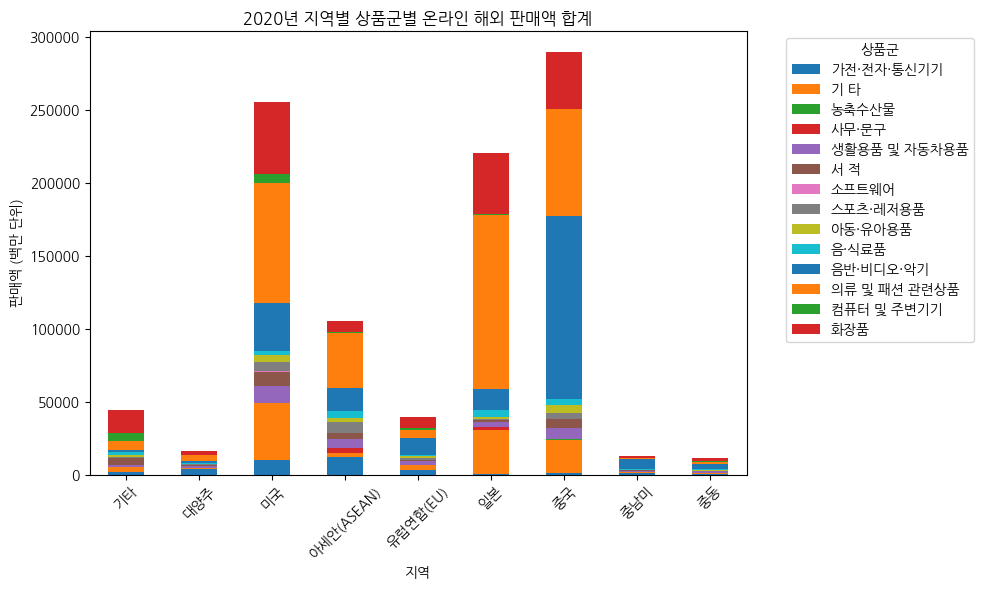

In [ ]:
grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('2020년 지역별 상품군별 온라인 해외 판매액 합계')
plt.xlabel('지역')
plt.ylabel('판매액 (백만 단위)')
plt.xticks(rotation=45)
plt.legend(title='상품군', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* 중국은 가장 높은 판매액을 기록하며 그중 음반, 비디오, 악기 상품군이 강세였음.
* 일본은 의류 및 패션 관련 상품군의 판매 비중이 특히 높음.
* 미국은 다양한 상품군에 대한 수요가 고르게 분포되어 있음

**Q4.**

In [ ]:
# "국가", "상품군별" 필터링
countries = ["미국", "중국", "일본"]
products = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

filtered_df = df[df["국가(대륙)별"].isin(countries) & df["상품군별"].isin(products)]

# 2021년까지 필터링
filtered_df = filtered_df[filtered_df["연도"] <= 2021]

# 피봇테이블 할당 (국가, 상품, 연도별 판매액 합계)
pivot_df = filtered_df.pivot_table(index=["연도", "국가(대륙)별"], columns="상품군별", values="백만", aggfunc="sum").reset_index()
pivot_df.head()

상품군별,연도,국가(대륙)별,음반·비디오·악기,의류 및 패션 관련상품,화장품
0,2017,미국,8628,49891,31237
1,2017,일본,2824,89085,6333
2,2017,중국,8437,84248,34608
3,2018,미국,13858,47353,38537
4,2018,일본,7018,134742,5276


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

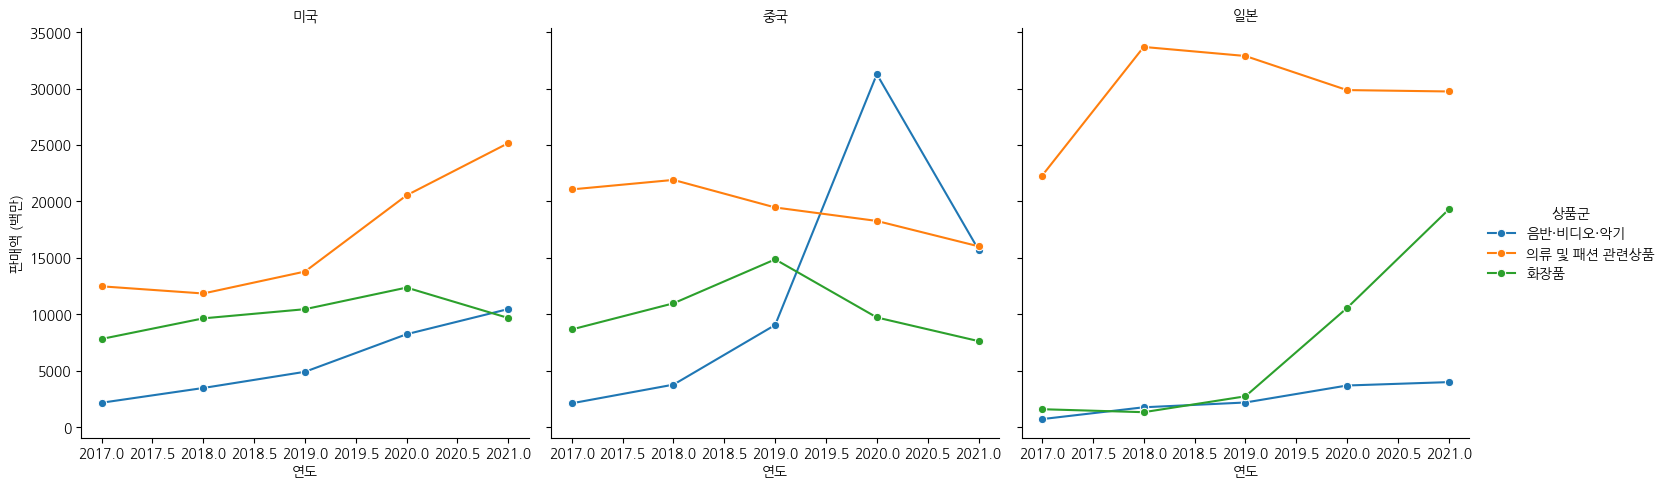

In [ ]:
# seaborn의 FacetGrid를 사용한 시각화
g = sns.FacetGrid(filtered_df, col="국가(대륙)별", hue="상품군별", col_wrap=3, height=5)
g.map(sns.lineplot, "연도", "백만", marker="o", ci=None)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("연도", "판매액 (백만)")
g.add_legend(title="상품군")
plt.show()